# EDA - Identify Driving Factors for Loan Defaults

#### Import Libs

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### set display options

In [160]:
pd.set_option('max_column',122)
pd.set_option('max_row',160)
pd.set_option('max_colwidth', 400)

# Read column description

In [161]:
column_desc = pd.read_csv('columns_description.csv',encoding= 'unicode_escape')
del column_desc['Unnamed: 0']


In [162]:
column_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
Table          160 non-null object
Row            160 non-null object
Description    160 non-null object
Special        69 non-null object
dtypes: object(4)
memory usage: 5.1+ KB


In [163]:
#column_desc[column_desc['Table'] == 'application_data']

In [164]:
#column_desc[column_desc['Table'] == 'previous_application.csv']

# Read application data

In [165]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Check distribution of Loan Type

In [166]:
application_data.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

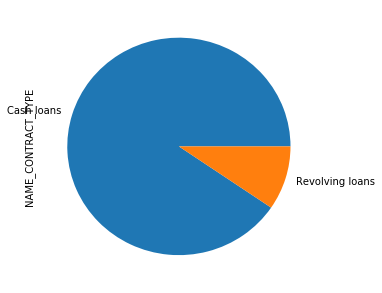

In [167]:
plt.figure(figsize=(5,5))
plt.title('')
application_data.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

#### check ditribution of Dafaulting & Non Defaulting candiatte

In [168]:
application_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

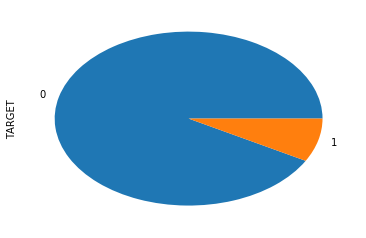

In [169]:
application_data.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

## check summary of application data

In [170]:
application_data.shape

(307511, 122)

In [171]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

#### check data types

In [172]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


# Application Data Cleaning

#### Drop columns with 30% or more NaN values and make a copy

In [173]:
ad_df = application_data.drop(['EXT_SOURCE_1','EXT_SOURCE_3','OWN_CAR_AGE','OCCUPATION_TYPE','FLOORSMIN_MODE','NONLIVINGAREA_MEDI','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'],axis=1)
ad_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Drop irrelevante columns 
#### NAME_TYPE_SUITE , WEEKDAY_APPR_PROCESS_START , HOUR_APPR_PROCESS_START

In [174]:
ad_df = ad_df.drop(['NAME_TYPE_SUITE' , 'WEEKDAY_APPR_PROCESS_START' ,'HOUR_APPR_PROCESS_START'],axis=1)

In [175]:
ad_df.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


#### Delete rows where DAYS_LAST_PHONE_CHANGE is NaN (row count is less than 1%)

In [176]:
ad_df = ad_df[ad_df['DAYS_LAST_PHONE_CHANGE'].notnull()]
ad_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Delete rows where AMT_ANNUITY is null (row count is less than 1%)

In [177]:
ad_df = ad_df[ad_df['AMT_ANNUITY'].notnull()]
ad_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Delete rows where AMT_GOODS_PRICE is null (row count less than 1%)

In [178]:
ad_df = ad_df[ad_df['AMT_GOODS_PRICE'].notnull()]

#### Delete rows where CNT_FAM_MEMBERS is null (row count less than 1%)

In [179]:
ad_df = ad_df[ad_df['CNT_FAM_MEMBERS'].notnull()]

#### Delete rows where EXT_SOURCE_2 is null (row count less than 1%)

In [180]:
ad_df = ad_df[ad_df['EXT_SOURCE_2'].notnull()]

#### Delete rows where CNT_FAM_MEMBERS is null (row count less than 1%)

In [181]:
ad_df = ad_df[ad_df['CNT_FAM_MEMBERS'].notnull()]

#### Delete rows where OBS_30_CNT_SOCIAL_CIRCLE is null (row count less than 1%)

In [182]:
ad_df = ad_df[ad_df['OBS_30_CNT_SOCIAL_CIRCLE'].notnull()]

#### Delete rows where DEF_30_CNT_SOCIAL_CIRCLE is null (row count less than 1%)

In [183]:
ad_df = ad_df[ad_df['DEF_30_CNT_SOCIAL_CIRCLE'].notnull()]

#### Delete rows where OBS_60_CNT_SOCIAL_CIRCLE is null (row count less than 1%)

In [184]:
ad_df = ad_df[ad_df['OBS_60_CNT_SOCIAL_CIRCLE'].notnull()]

#### Delete rows where DEF_60_CNT_SOCIAL_CIRCLE is null (row count less than 1%)

In [185]:
ad_df = ad_df[ad_df['DEF_60_CNT_SOCIAL_CIRCLE'].notnull()]

#### check for duplicated rows

In [186]:
ad_df[ad_df.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


#### check cleaned application data frame shape

In [187]:
ad_df.shape

(305545, 68)

In [188]:
ad_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert total income in 100 thousands

In [189]:
ad_df.AMT_INCOME_TOTAL = ad_df.AMT_INCOME_TOTAL.apply(lambda x : round(x/1000,2))

#### Covert AMT_CREDIT in 100 thousands

In [190]:
ad_df.AMT_CREDIT = ad_df.AMT_CREDIT.apply(lambda x : round(x/1000,2))

#### Covert AMT_ANNUITY in 100 thousands

In [191]:
ad_df.AMT_ANNUITY = ad_df.AMT_ANNUITY.apply(lambda x : round(x/1000,2))

#### Covert AMT_GOODS_PRICE in 100 thousands

In [192]:
ad_df.AMT_GOODS_PRICE = ad_df.AMT_GOODS_PRICE.apply(lambda x : round(x/1000,2))

#### segment data frame based on Target column

In [193]:
ad_df_t0 = ad_df[ad_df.TARGET == 0].copy()
ad_df_t1 = ad_df[ad_df.TARGET == 1].copy()

#### Univariate analysis for column DAYS_LAST_PHONE_CHANGE

In [194]:
ad_df.DAYS_LAST_PHONE_CHANGE = ad_df.DAYS_LAST_PHONE_CHANGE*-1
ad_df.DAYS_LAST_PHONE_CHANGE.describe()

count    305545.000000
mean        963.776884
std         827.163502
min          -0.000000
25%         274.000000
50%         758.000000
75%        1571.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [195]:
ad_df_t0.DAYS_LAST_PHONE_CHANGE = ad_df_t0.DAYS_LAST_PHONE_CHANGE*-1
ad_df_t0.DAYS_LAST_PHONE_CHANGE.describe()

count    280829.000000
mean        977.403131
std         831.603999
min          -0.000000
25%         282.000000
50%         778.000000
75%        1587.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [196]:
ad_df_t1.DAYS_LAST_PHONE_CHANGE = ad_df_t1.DAYS_LAST_PHONE_CHANGE*-1
ad_df_t1.DAYS_LAST_PHONE_CHANGE.describe()

count    24716.000000
mean       808.952258
std        757.925625
min         -0.000000
25%        194.000000
50%        595.000000
75%       1301.000000
max       4070.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

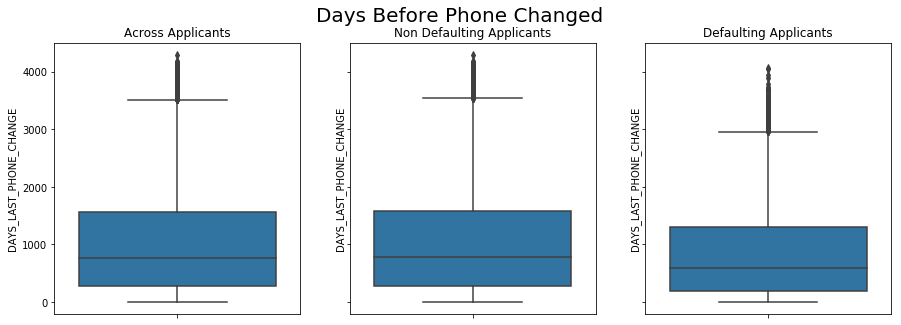

In [197]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey= True)
fig.suptitle('Days Before Phone Changed',fontsize=20)
sns.boxplot(ax=ax[0], y=ad_df.DAYS_LAST_PHONE_CHANGE)
ax[0].set_title('Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.DAYS_LAST_PHONE_CHANGE)
ax[1].set_title('Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.DAYS_LAST_PHONE_CHANGE)
ax[2].set_title('Defaulting Applicants')
plt.show()

#### Univariate analysis of column EXT_SOURCE_2

In [198]:
ad_df.EXT_SOURCE_2 = ad_df.EXT_SOURCE_2.apply(lambda x : round(x,2))

In [199]:
ad_df.EXT_SOURCE_2.describe()

count    305545.000000
mean          0.514265
std           0.191127
min           0.000000
25%           0.390000
50%           0.570000
75%           0.660000
max           0.850000
Name: EXT_SOURCE_2, dtype: float64

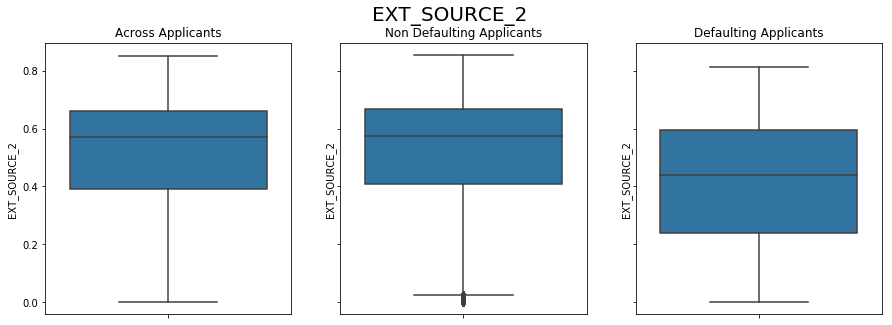

In [200]:
#sns.boxplot(ad_df.EXT_SOURCE_2)
#plt.show()
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey= True)
fig.suptitle("EXT_SOURCE_2",fontsize=20)
sns.boxplot(ax=ax[0], y=ad_df.EXT_SOURCE_2)
ax[0].set_title('Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.EXT_SOURCE_2)
ax[1].set_title('Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.EXT_SOURCE_2)
ax[2].set_title('Defaulting Applicants')
plt.show()

#### Univariate Analysis of column LIVE_CITY_NOT_WORK_CITY

In [201]:
ad_df.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    250662
1     54883
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [202]:
ad_df.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize=True)

0    0.820377
1    0.179623
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

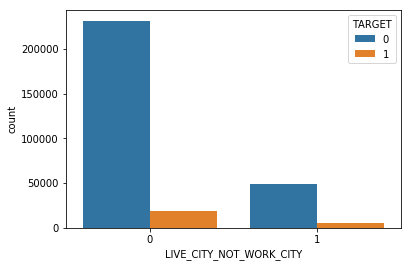

In [203]:
ax1=sns.countplot(x='LIVE_CITY_NOT_WORK_CITY',hue='TARGET',data=ad_df)
plt.show()

#### Univarate analysis for column REG_CITY_NOT_WORK_CITY
###### Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

In [204]:
ad_df.REG_CITY_NOT_WORK_CITY.value_counts()

0    235102
1     70443
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [205]:
ad_df.REG_CITY_NOT_WORK_CITY.value_counts(normalize=True)

0    0.769451
1    0.230549
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

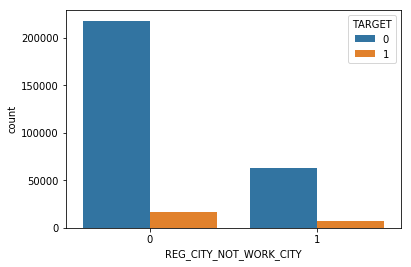

In [206]:
#ad_df.REG_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.pie()
ax1=sns.countplot(x='REG_CITY_NOT_WORK_CITY',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column REG_REGION_NOT_LIVE_REGION
###### Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

In [207]:
ad_df.REG_REGION_NOT_LIVE_REGION.value_counts()

0    300918
1      4627
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [208]:
ad_df.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True)

0    0.984857
1    0.015143
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

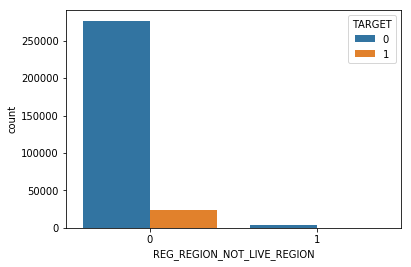

In [209]:
#ad_df.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True).plot.pie()
ax1=sns.countplot(x='REG_REGION_NOT_LIVE_REGION',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column REGION_RATING_CLIENT_W_CITY
###### Our rating of the region where client lives with taking city into account (1,2,3)

In [210]:
ad_df.REGION_RATING_CLIENT_W_CITY.value_counts()

2    228042
3     43662
1     33841
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [211]:
ad_df.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)

2    0.746345
3    0.142899
1    0.110756
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

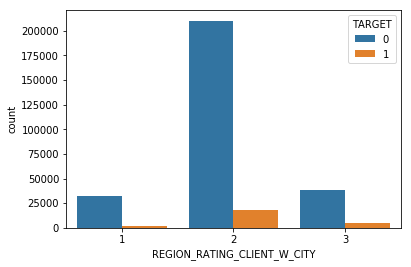

In [212]:
#ad_df.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.pie()
ax1=sns.countplot(x='REGION_RATING_CLIENT_W_CITY',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column REGION_RATING_CLIENT
###### Our rating of the region where client lives (1,2,3)

In [213]:
ad_df.REGION_RATING_CLIENT.value_counts()

2    225559
3     48112
1     31874
Name: REGION_RATING_CLIENT, dtype: int64

In [214]:
ad_df.REGION_RATING_CLIENT.value_counts(normalize=True)

2    0.738219
3    0.157463
1    0.104319
Name: REGION_RATING_CLIENT, dtype: float64

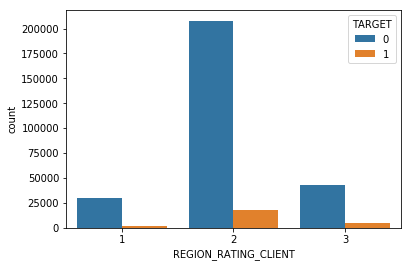

In [215]:
#ad_df.REGION_RATING_CLIENT.value_counts(normalize=True).plot.pie()
ax1=sns.countplot(x='REGION_RATING_CLIENT',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column CNT_FAM_MEMBERS.
###### How many family members does client have

In [216]:
ad_df.CNT_FAM_MEMBERS.describe()

count    305545.000000
mean          2.152986
std           0.910665
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

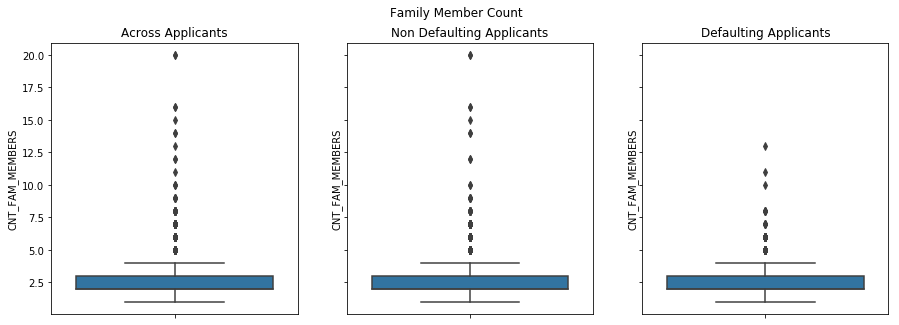

In [217]:
#sns.boxplot(ad_df.CNT_FAM_MEMBERS)
#plt.show()
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Family Member Count')
sns.boxplot(ax=ax[0], y=ad_df.CNT_FAM_MEMBERS)
ax[0].set_title('Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.CNT_FAM_MEMBERS)
ax[1].set_title('Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.CNT_FAM_MEMBERS)
ax[2].set_title('Defaulting Applicants')
plt.show()

#### Univariate analysis of FLAG_EMAIL
###### Did client provide email (1=YES, 0=NO)

In [218]:
ad_df.FLAG_EMAIL.value_counts()

0    288191
1     17354
Name: FLAG_EMAIL, dtype: int64

In [219]:
ad_df.FLAG_EMAIL.value_counts(normalize=True)

0    0.943203
1    0.056797
Name: FLAG_EMAIL, dtype: float64

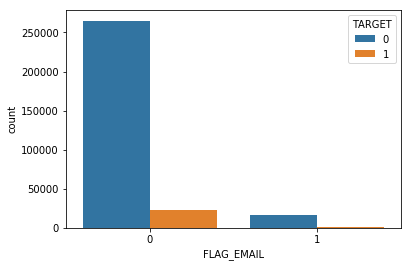

In [220]:
#ad_df.FLAG_EMAIL.value_counts(normalize=True).plot.pie()
ax1=sns.countplot(x='FLAG_EMAIL',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column NAME_CONTRACT_TYPE

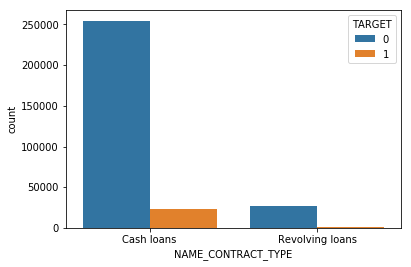

In [221]:
ax1=sns.countplot(x='NAME_CONTRACT_TYPE',hue='TARGET',data=ad_df)
plt.show()

#### Univariate Analysis of Gender

In [222]:
ad_df.CODE_GENDER.value_counts(normalize=True)

F      0.658162
M      0.341825
XNA    0.000013
Name: CODE_GENDER, dtype: float64

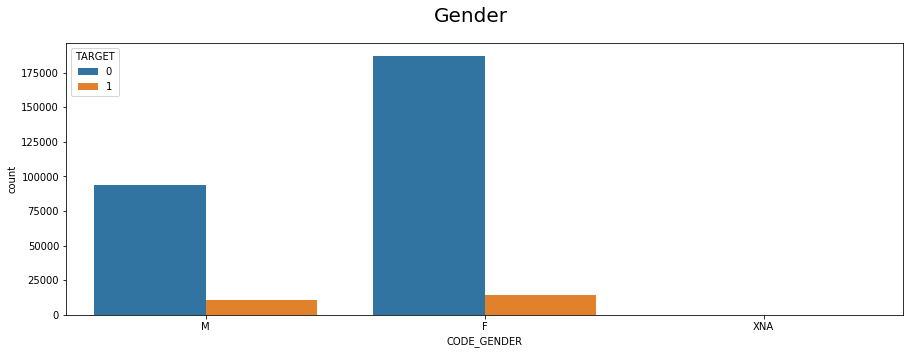

In [223]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharey=True)
fig.suptitle('Gender',fontsize=20)
ax1=sns.countplot(x='CODE_GENDER',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column FLAG_OWN_CAR

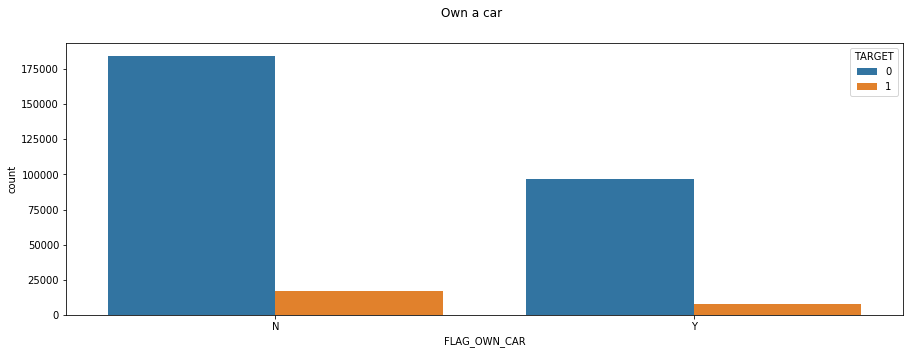

In [224]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Own a car')
ax1=sns.countplot(x='FLAG_OWN_CAR',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column FLAG_OWN_REALTY

In [225]:
ad_df.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693463
N    0.306537
Name: FLAG_OWN_REALTY, dtype: float64

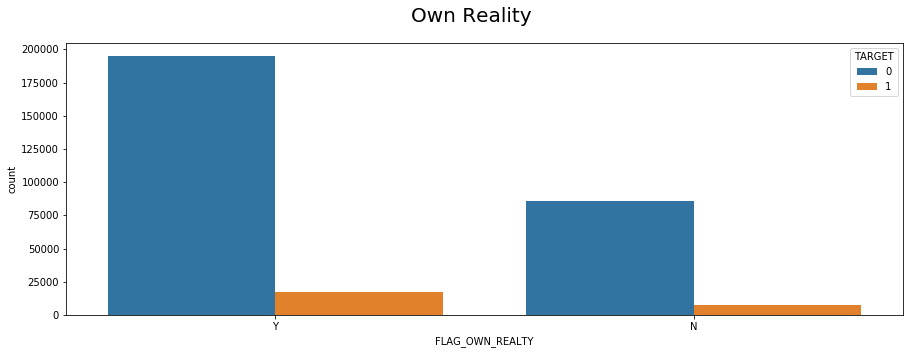

In [226]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Own Reality',fontsize=20)
ax1=sns.countplot(x='FLAG_OWN_REALTY',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column CNT_CHILDREN

In [227]:
ad_df.CNT_CHILDREN.describe()

count    305545.000000
mean          0.417091
std           0.722237
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

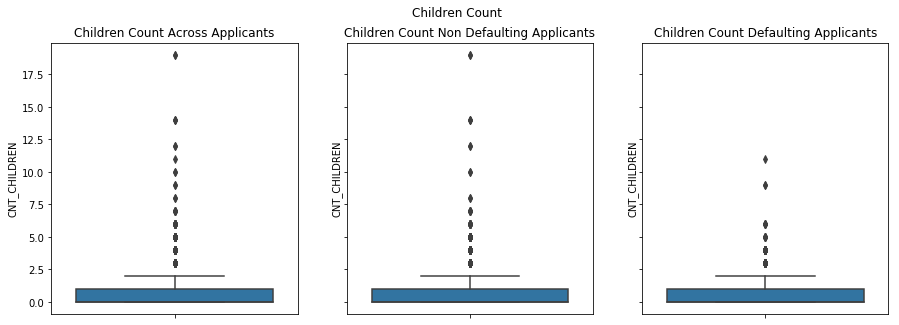

In [228]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Children Count')
sns.boxplot(ax=ax[0], y=ad_df.CNT_CHILDREN)
ax[0].set_title('Children Count Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.CNT_CHILDREN)
ax[1].set_title('Children Count Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.CNT_CHILDREN)
ax[2].set_title('Children Count Defaulting Applicants')
plt.show()

#### Univariate analysis of column AMT_INCOME_TOTAL

In [229]:
ad_df.AMT_INCOME_TOTAL.describe()

count    305545.000000
mean        168.714165
std         237.587912
min          25.650000
25%         112.500000
50%         148.500000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

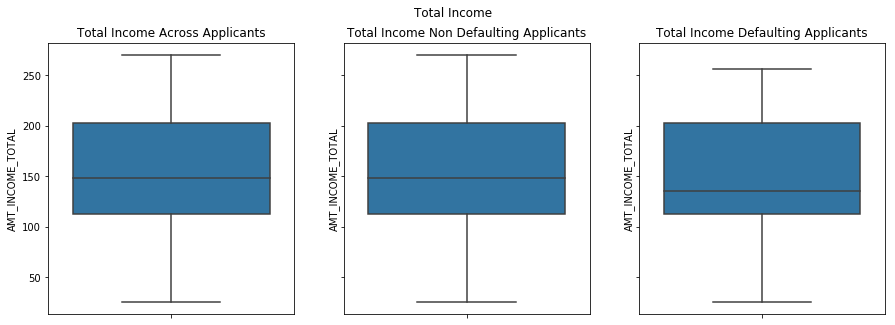

In [230]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Total Income')
sns.boxplot(ax=ax[0], y=ad_df.AMT_INCOME_TOTAL.quantile([0,.25,.5,.75,.9]))
ax[0].set_title('Total Income Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.AMT_INCOME_TOTAL.quantile([0,.25,.5,.75,.9]))
ax[1].set_title('Total Income Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.AMT_INCOME_TOTAL.quantile([0,.25,.5,.75,.9]))
ax[2].set_title('Total Income Defaulting Applicants')
plt.show()

In [231]:
ad_df = ad_df[ad_df.AMT_INCOME_TOTAL < 250]

#### Univariate analysis of column AMT_CREDIT

In [232]:
ad_df.AMT_CREDIT.describe()

count    266079.000000
mean        555.367930
std         366.473224
min          45.000000
25%         269.550000
50%         479.640000
75%         760.230000
max        3375.000000
Name: AMT_CREDIT, dtype: float64

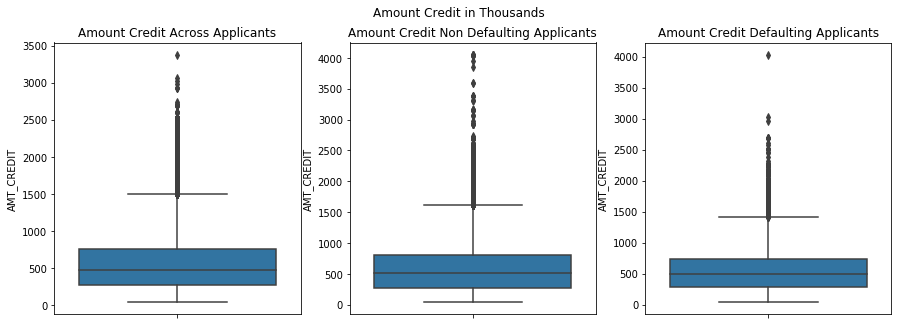

In [233]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Amount Credit in Thousands')
sns.boxplot(ax=ax[0], y=ad_df.AMT_CREDIT)
ax[0].set_title('Amount Credit Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.AMT_CREDIT)
ax[1].set_title('Amount Credit Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.AMT_CREDIT)
ax[2].set_title('Amount Credit Defaulting Applicants')
plt.show()

#### Univariate analysis of column AMT_ANNUITY

In [234]:
ad_df.AMT_ANNUITY.describe()

count    266079.000000
mean         25.239390
std          12.604801
min           1.620000
25%          15.840000
50%          23.680000
75%          32.050000
max         225.000000
Name: AMT_ANNUITY, dtype: float64

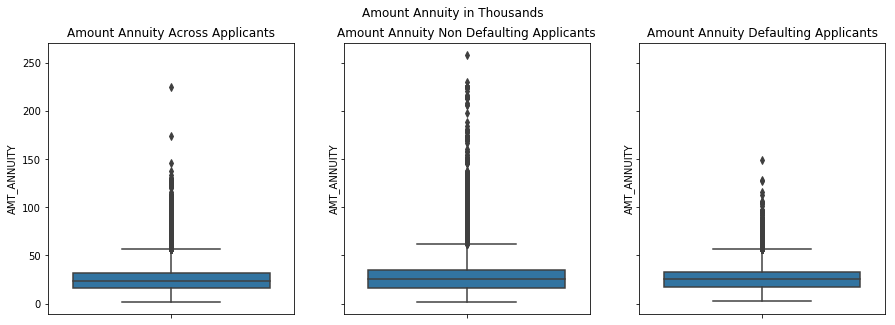

In [235]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Amount Annuity in Thousands')
sns.boxplot(ax=ax[0], y=ad_df.AMT_ANNUITY)
ax[0].set_title('Amount Annuity Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.AMT_ANNUITY)
ax[1].set_title('Amount Annuity Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.AMT_ANNUITY)
ax[2].set_title('Amount Annuity Defaulting Applicants')
plt.show()

#### Univariate analysis of AMT_GOODS_PRICE

In [236]:
ad_df.AMT_GOODS_PRICE.describe()

count    266079.000000
mean        497.006640
std         333.737909
min          40.500000
25%         225.000000
50%         450.000000
75%         675.000000
max        3375.000000
Name: AMT_GOODS_PRICE, dtype: float64

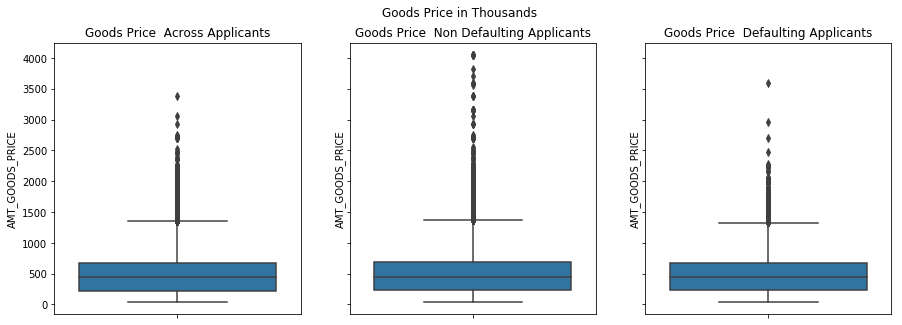

In [237]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Goods Price in Thousands')
sns.boxplot(ax=ax[0], y=ad_df.AMT_GOODS_PRICE)
ax[0].set_title('Goods Price  Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.AMT_GOODS_PRICE)
ax[1].set_title('Goods Price  Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.AMT_GOODS_PRICE)
ax[2].set_title('Goods Price  Defaulting Applicants')
plt.show()

#### Univariate analysis of Column NAME_INCOME_TYPE

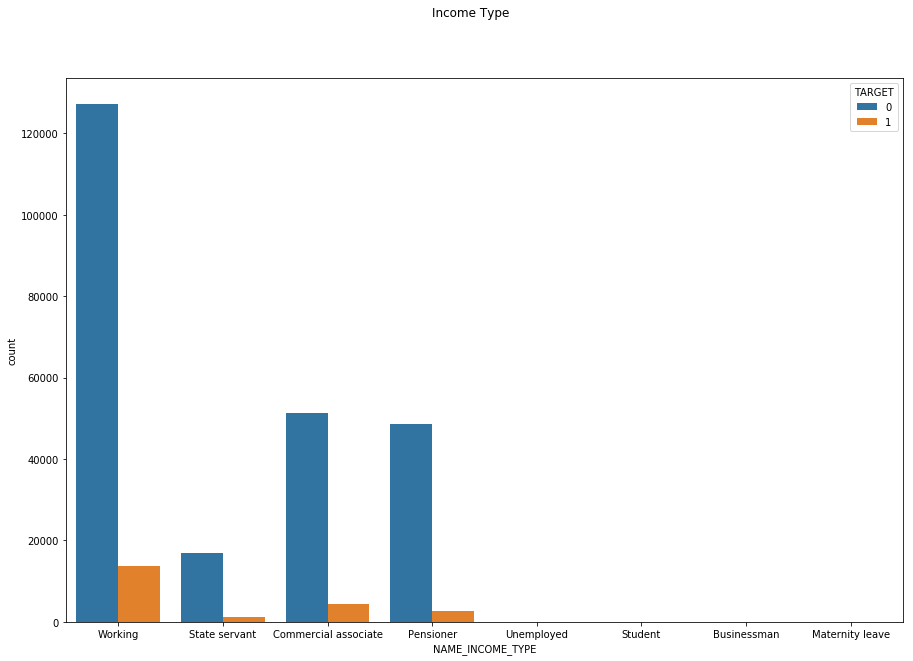

In [238]:
fig, ax = plt.subplots(1,1,figsize=(15,10),sharey=True)
fig.suptitle('Income Type')
ax1=sns.countplot(x='NAME_INCOME_TYPE',hue='TARGET',data=ad_df)
plt.show()

#### Univariate analysis of column NAME_EDUCATION_TYPE

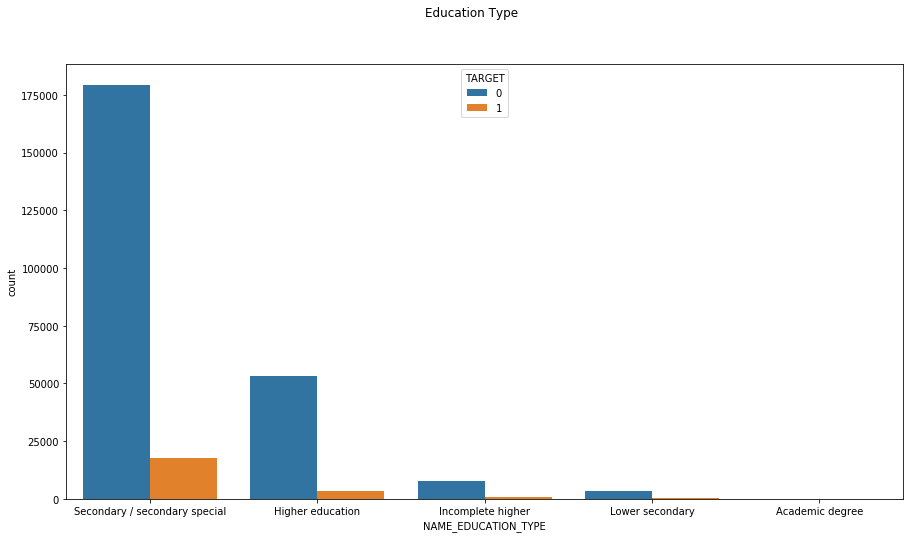

In [239]:
fig, ax = plt.subplots(1,1,figsize=(15,8),sharex=True,sharey=True)
fig.suptitle('Education Type')
ax1=sns.countplot(x='NAME_EDUCATION_TYPE',hue='TARGET',data=ad_df)
plt.show()

#### Univariate Analysis of column - NAME_FAMILY_STATUS

In [240]:
ad_df.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.633940
Single / not married    0.148851
Civil marriage          0.097674
Separated               0.063861
Widow                   0.055675
Name: NAME_FAMILY_STATUS, dtype: float64

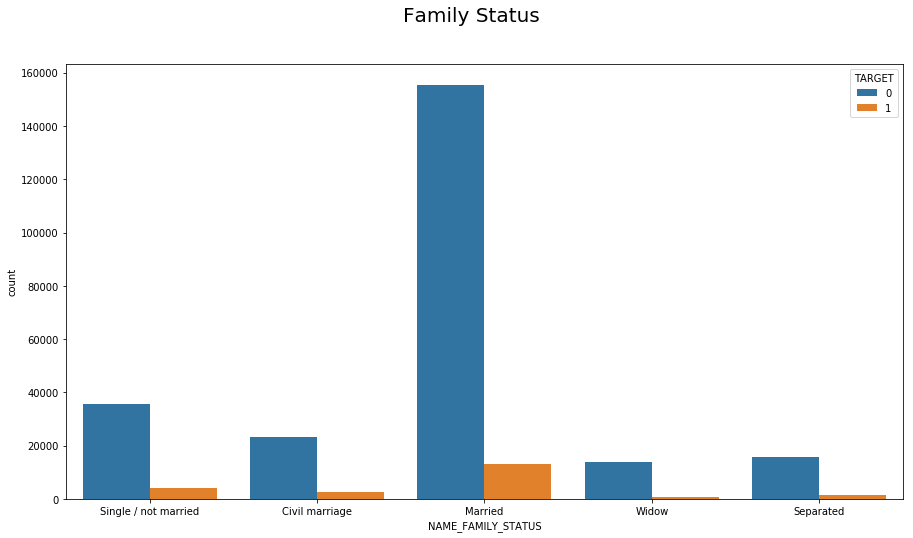

In [241]:
fig, ax = plt.subplots(1,1,figsize=(15,8),sharex=True,sharey=True)
fig.suptitle('Family Status',fontsize=20)
ax1=sns.countplot(x='NAME_FAMILY_STATUS',hue='TARGET',data=ad_df)
plt.show()

#### Univariate Analysis of column -NAME_HOUSING_TYPE

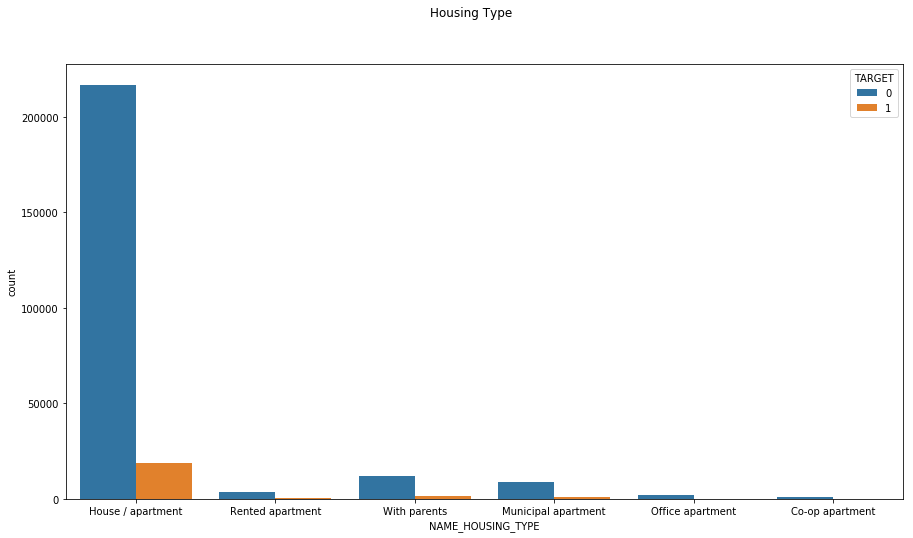

In [242]:
fig, ax = plt.subplots(1,1,figsize=(15,8),sharex=True,sharey=True)
fig.suptitle('Housing Type')
ax1=sns.countplot(x='NAME_HOUSING_TYPE',hue='TARGET',data=ad_df)
plt.show()

In [243]:
ad_df.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202.5,406.6,24.7,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.26,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


#### Univariate Analysis of column - DAYS_BIRTH

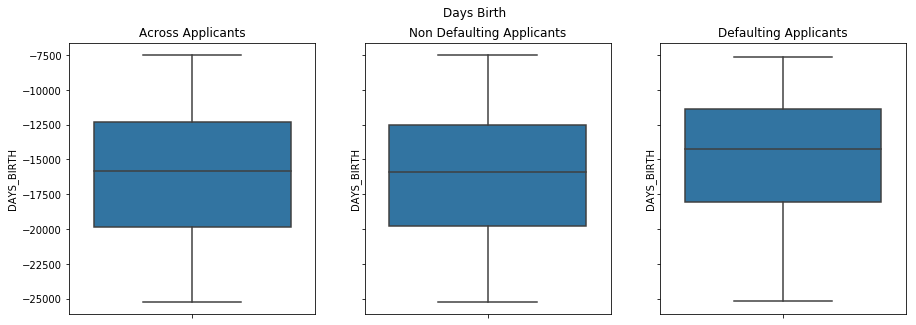

In [244]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Days Birth')
sns.boxplot(ax=ax[0], y=ad_df.DAYS_BIRTH)
ax[0].set_title('Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.DAYS_BIRTH)
ax[1].set_title('Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.DAYS_BIRTH)
ax[2].set_title('Defaulting Applicants')
plt.show()

#### Univariate Analysis of column - DAYS_EMPLOYED

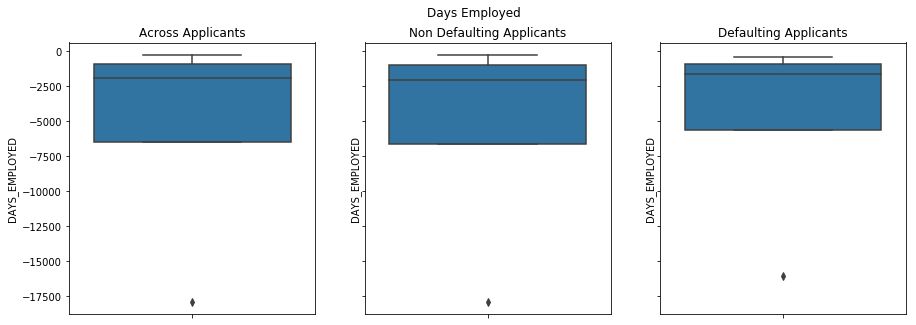

In [245]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Days Employed')
sns.boxplot(ax=ax[0], y=ad_df.DAYS_EMPLOYED.quantile([0,.25,.50,.75]))
ax[0].set_title('Across Applicants')
sns.boxplot(ax=ax[1], y=ad_df_t0.DAYS_EMPLOYED.quantile([0,.25,.50,.75]))
ax[1].set_title('Non Defaulting Applicants')
sns.boxplot(ax=ax[2], y=ad_df_t1.DAYS_EMPLOYED.quantile([0,.25,.50,.75]))
ax[2].set_title('Defaulting Applicants')
plt.show()

## Bivariate Analysis

#### Bivariate Analysis for column NAME_CONTRACT_TYPE vs Target

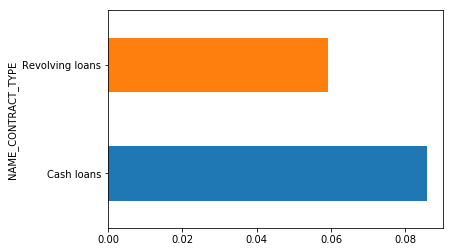

In [246]:
ad_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Bivariate Analysis of column CODE_GENDER vs Target

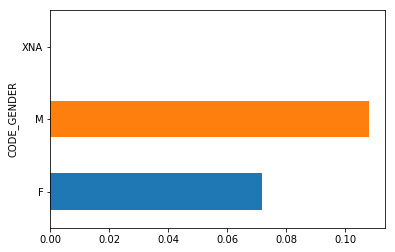

In [247]:
ad_df.groupby(['CODE_GENDER'])['TARGET'].mean().plot.barh()
plt.show()

#### Bivariate Analysis of NAME_INCOME_TYPE vs Target

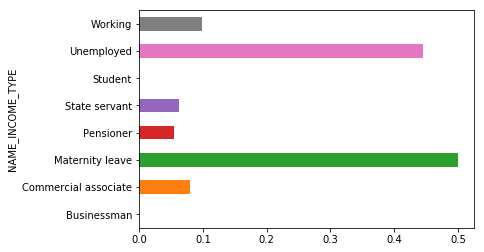

In [248]:
ad_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Bivariate Analysis of columns NAME_EDUCATION_TYPE vs TARGET

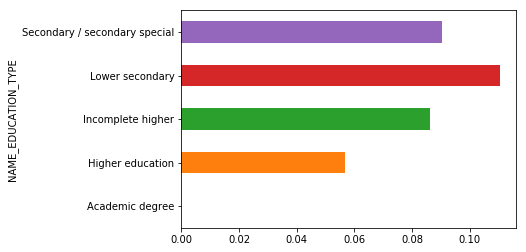

In [249]:
ad_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Bivariate Analysis of column NAME_HOUSING_TYPE vs TARGET

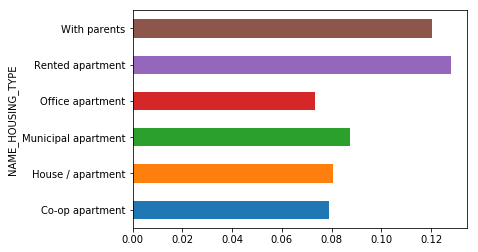

In [250]:
ad_df.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

## Multivariate Analysis of application data

#### Multivariate Analysis for column - NAME_CONTRACT_TYPE & NAME_INCOME_TYPE vs TARGET

In [251]:
ad_df.TARGET.mean()

0.08332863548044002

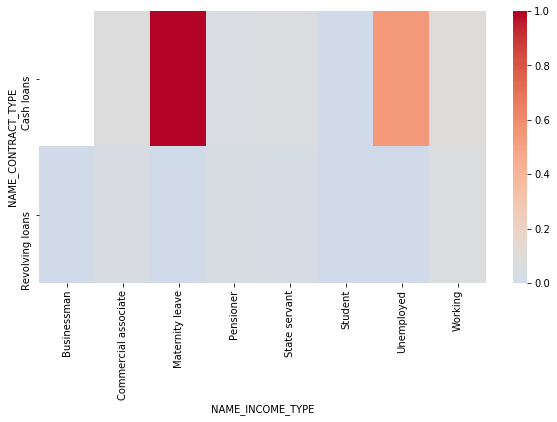

In [252]:
temp = ad_df.pivot_table(index='NAME_CONTRACT_TYPE',columns='NAME_INCOME_TYPE',values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',center=.081)
plt.show()

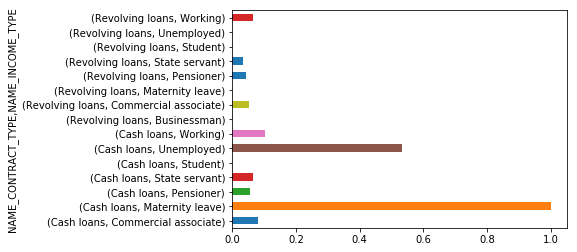

In [253]:
ad_df.groupby(['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivriate Analysis for column - NAME_CONTRACT_TYPE & NAME_FAMILY_STATUS vs TARGET

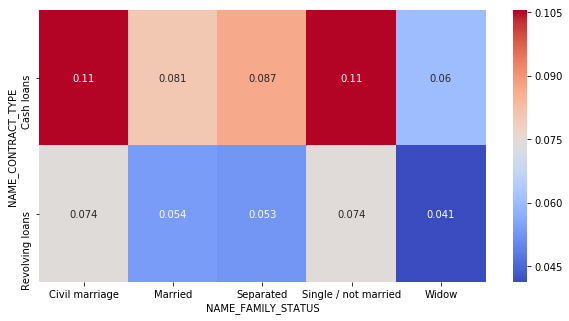

In [254]:
temp = ad_df.pivot_table(index='NAME_CONTRACT_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',annot=True)
plt.show()

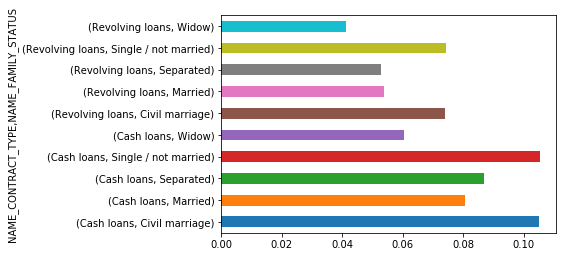

In [255]:
ad_df.groupby(['NAME_CONTRACT_TYPE','NAME_FAMILY_STATUS'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate Analysis for column - NAME_CONTRACT_TYPE, NAME_EDUCATION_TYPE

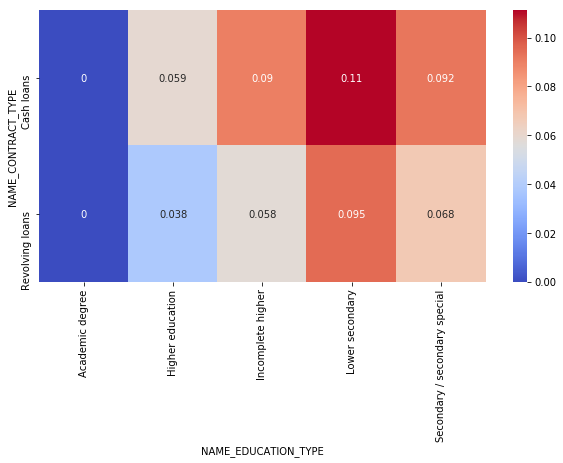

In [256]:
temp = ad_df.pivot_table(index='NAME_CONTRACT_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',annot=True)
plt.show()

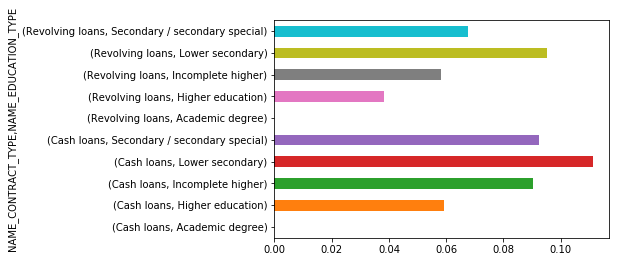

In [257]:
ad_df.groupby(['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate Analysis for column - NAME_CONTRACT_TYPE, NAME_HOUSING_TYPE vs TARGET

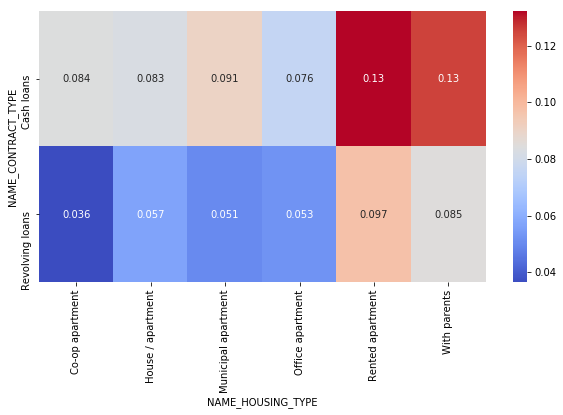

In [258]:
temp = ad_df.pivot_table(index='NAME_CONTRACT_TYPE',columns=['NAME_HOUSING_TYPE'],values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',annot=True)
plt.show()

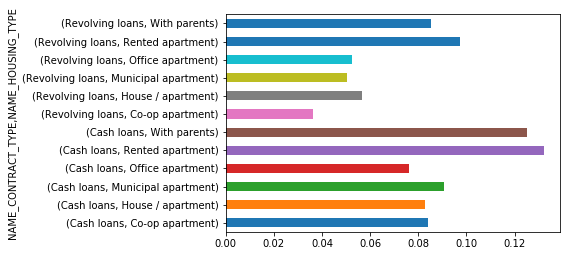

In [259]:
ad_df.groupby(['NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Mutlivariate Analysis for column - CODE_GENDER , NAME_INCOME_TYPE vs TARGET

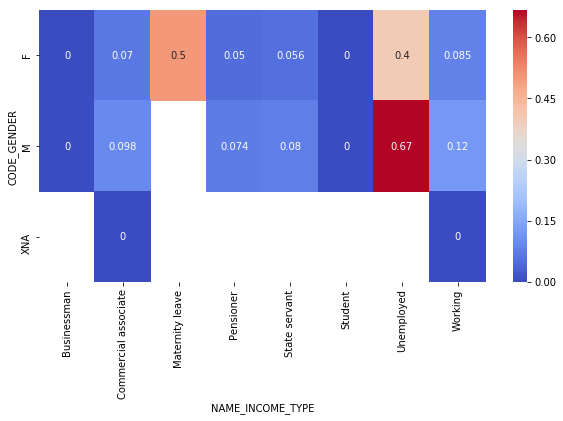

In [260]:
temp = ad_df.pivot_table(index='CODE_GENDER',columns=['NAME_INCOME_TYPE'],values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',annot=True)
plt.show()

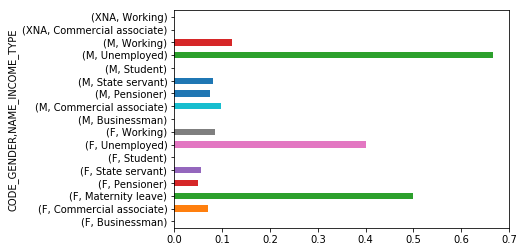

In [261]:
ad_df.groupby(['CODE_GENDER','NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate Analysis for column - FLAG_OWN_CAR , FLAG_OWN_REALTY vs TARGET

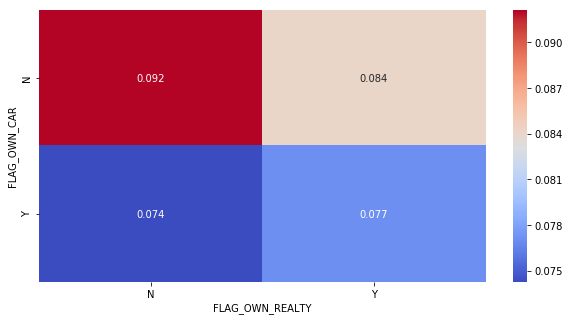

In [262]:
temp = ad_df.pivot_table(index='FLAG_OWN_CAR',columns=['FLAG_OWN_REALTY'],values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',annot=True)
plt.show()

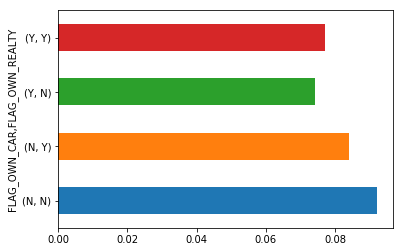

In [263]:
ad_df.groupby(['FLAG_OWN_CAR','FLAG_OWN_REALTY'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate Analysis for column - NAME_INCOME_TYPE vs NAME_FAMILY_STATUS vs TARGET

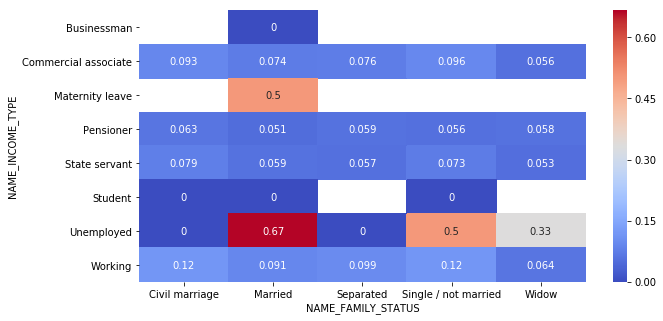

In [264]:
temp = ad_df.pivot_table(index='NAME_INCOME_TYPE',columns=['NAME_FAMILY_STATUS'],values='TARGET')
plt.figure(figsize=(10,5))
sns.heatmap(temp,cmap='coolwarm',annot=True)
plt.show()

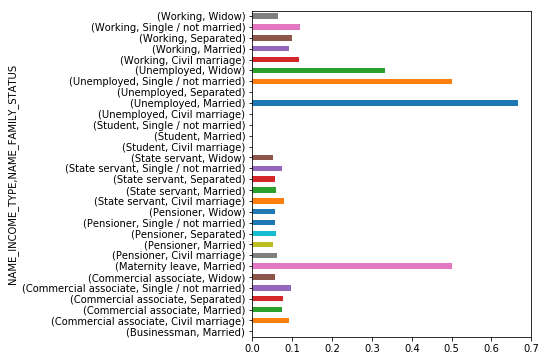

In [265]:
plt.figure(figsize=(5,6))
ad_df.groupby(['NAME_INCOME_TYPE','NAME_FAMILY_STATUS'])['TARGET'].mean().plot.barh()
plt.show()

In [266]:
ad_df.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202.5,406.6,24.7,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.26,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


#### Identifying Top 10 Correlations
- Note- Code is commented as its time consuming task, so uncomment when need to run

In [267]:
# cols1 = ['DAYS_TERMINATION','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_DUE_1ST_VERSION','REGION_RATING_CLIENT','REG_REGION_NOT_WORK_REGION','DEF_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY_y','REG_CITY_NOT_WORK_CITY','DAYS_BIRTH','EXT_SOURCE_2','AMT_INCOME_TOTAL','CNT_CHILDREN','DAYS_LAST_DUE','OBS_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE_y','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_LIVE_REGION','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT_y','FLAG_EMP_PHONE']
# cols2 = ['DAYS_TERMINATION','OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_DUE_1ST_VERSION','REGION_RATING_CLIENT','REG_REGION_NOT_WORK_REGION','DEF_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY_y','REG_CITY_NOT_WORK_CITY','DAYS_BIRTH','EXT_SOURCE_2','AMT_INCOME_TOTAL','CNT_CHILDREN','DAYS_LAST_DUE','OBS_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE_y','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_LIVE_REGION','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT_y','FLAG_EMP_PHONE']

# fig, ax = plt.subplots(65,5,figsize=(25,80))
# fig.tight_layout(pad=30.0)
# lis = []
# row = 0
# column=0
# for c1 in cols1 :    
#     for c2 in cols2 :
#         if c1 != c2 :
#             print(row,",",column)            
#             temp = pa_df_temp[[c1,c2]].corr()
#             sns.heatmap(temp,cmap='coolwarm',annot=True,center=.081,ax=ax[row,column])
#             column = column +1
#             if column >=5 :
#                 row = row +1
#                 column = 0
#     cols2.remove(c1)    
# plt.show()

#### Draw Heat Map among relevant columns 
Note- Code is commented as its time consuming task, so uncomment when need to run

In [268]:
#cols1 = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE']
#cols2 = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE']

#fig, ax = plt.subplots(9,4,figsize=(20,35))
#fig.tight_layout(pad=9.0)
#lis = []
#row = 0
#column=0
#for c1 in cols1 :    
    #for c2 in cols2 :
        #if c1 != c2 :
            #print(row,",",column)            
            #temp = ad_df.pivot_table(index=c1,columns=c2,values='TARGET')
            #sns.heatmap(temp,cmap='coolwarm',annot=True,center=.081,ax=ax[row,column])
            #column = column +1
            #if column >=4 :
                #row = row +1
                #column = 0
    #cols2.remove(c1)    
#plt.show()

#### draw Scatter among relevant column
Note- Code is commented as its time consuming task, so uncomment when need to run

In [269]:
#cols1 = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
#cols2 = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

#fig, ax = plt.subplots(9,4,figsize=(20,35))
#fig.tight_layout(pad=3.0)
#lis = []
#row = 0
#column=0
#for c1 in cols1 :    
    #for c2 in cols2 :
        #if c1 != c2 :
            #print(row,",",column)
            #sns.scatterplot(x=c1,y=c2,hue='TARGET',data=ad_df,ax=ax[row,column])
            #column = column +1
            #if column >=4 :
                #row = row +1
                #column = 0
    #cols2.remove(c1)
    
#plt.show()
    

#### Univariate analysis for column - FLAG_DOCUMENT

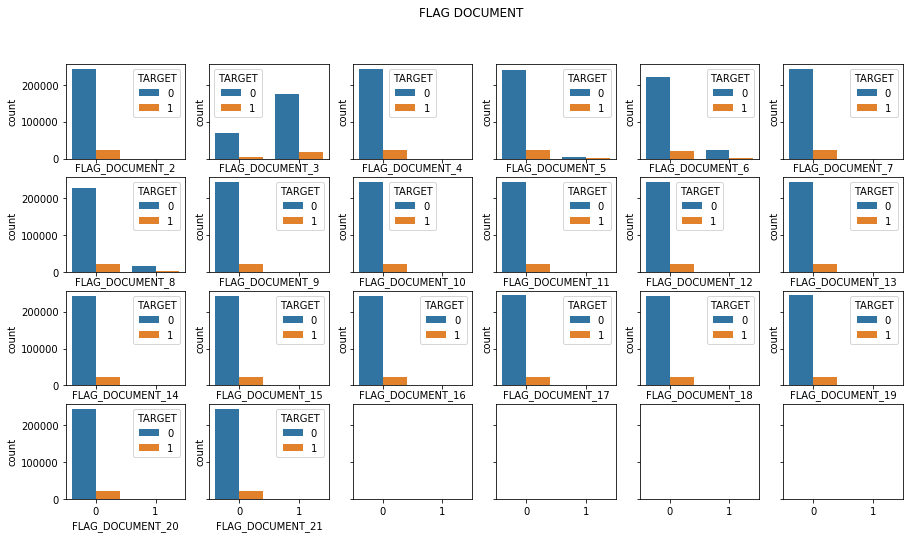

In [270]:
fig, ax = plt.subplots(4,6,figsize=(15,8),sharex=True,sharey=True)
fig.suptitle('FLAG DOCUMENT')
sns.countplot(x='FLAG_DOCUMENT_2',hue='TARGET',data=ad_df,ax=ax[0,0])
sns.countplot(x='FLAG_DOCUMENT_3',hue='TARGET',data=ad_df,ax=ax[0,1])
sns.countplot(x='FLAG_DOCUMENT_4',hue='TARGET',data=ad_df,ax=ax[0,2])
sns.countplot(x='FLAG_DOCUMENT_5',hue='TARGET',data=ad_df,ax=ax[0,3])
sns.countplot(x='FLAG_DOCUMENT_6',hue='TARGET',data=ad_df,ax=ax[0,4])
sns.countplot(x='FLAG_DOCUMENT_7',hue='TARGET',data=ad_df,ax=ax[0,5])
sns.countplot(x='FLAG_DOCUMENT_8',hue='TARGET',data=ad_df,ax=ax[1,0])
sns.countplot(x='FLAG_DOCUMENT_9',hue='TARGET',data=ad_df,ax=ax[1][1])
sns.countplot(x='FLAG_DOCUMENT_10',hue='TARGET',data=ad_df,ax=ax[1][2])
sns.countplot(x='FLAG_DOCUMENT_11',hue='TARGET',data=ad_df,ax=ax[1][3])
sns.countplot(x='FLAG_DOCUMENT_12',hue='TARGET',data=ad_df,ax=ax[1][4])
sns.countplot(x='FLAG_DOCUMENT_13',hue='TARGET',data=ad_df,ax=ax[1][5])
sns.countplot(x='FLAG_DOCUMENT_14',hue='TARGET',data=ad_df,ax=ax[2][0])
sns.countplot(x='FLAG_DOCUMENT_15',hue='TARGET',data=ad_df,ax=ax[2][1])
sns.countplot(x='FLAG_DOCUMENT_16',hue='TARGET',data=ad_df,ax=ax[2][2])
sns.countplot(x='FLAG_DOCUMENT_17',hue='TARGET',data=ad_df,ax=ax[2][3])
sns.countplot(x='FLAG_DOCUMENT_18',hue='TARGET',data=ad_df,ax=ax[2][4])
sns.countplot(x='FLAG_DOCUMENT_19',hue='TARGET',data=ad_df,ax=ax[2][5])
sns.countplot(x='FLAG_DOCUMENT_20',hue='TARGET',data=ad_df,ax=ax[3][0])
sns.countplot(x='FLAG_DOCUMENT_21',hue='TARGET',data=ad_df,ax=ax[3][1])

plt.show()

# Read Previous application data

In [271]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## check summary of previous application data

In [272]:
previous_application.shape

(1670214, 37)

#### Check Distribution of Loan status

In [273]:
previous_application.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

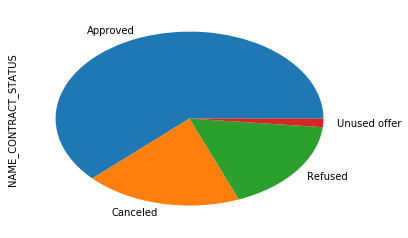

In [274]:
previous_application.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.show()

#### Check distribution based on loan Type

In [275]:
previous_application.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

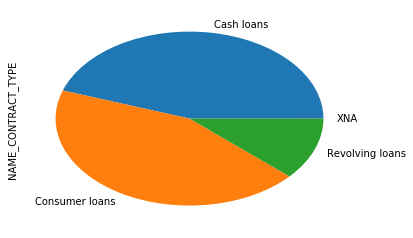

In [276]:
previous_application.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

#### Check for Null Column

In [277]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Check for data types

In [278]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [279]:
#column_desc.head(1)

In [280]:
#column_desc[column_desc.Row == 'NAME_TYPE_SUITE']

# Previous application data cleaning

## Delete rows with loan amount zero

In [281]:
pa_df = previous_application[previous_application.AMT_APPLICATION != 0]
pa_df = pa_df.copy()

#### Check for null values in updated data

In [282]:
pa_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                      37089
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                503467
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               503467
RATE_INTEREST_PRIMARY          1271861
RATE_INTEREST_PRIVILEGED       1271861
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 430443
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Check percentage of null values in interest columns

In [283]:
null_RATE_INTEREST_PRIMARY = pa_df[(pa_df.RATE_INTEREST_PRIMARY.isnull())]

In [284]:
null_RATE_INTEREST_PRIMARY.shape[0]/pa_df.shape[0]

0.9953428203835932

In [285]:
null_RATE_INTEREST_PRIVILEGED = pa_df[pa_df.RATE_INTEREST_PRIVILEGED.isnull()]

In [286]:
null_RATE_INTEREST_PRIVILEGED.shape[0]/pa_df.shape[0]

0.9953428203835932

## drop column with 99% NaN values

In [287]:
pa_df.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1,inplace=True)

In [288]:
pa_df.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


#### Check for duplicate data points

In [289]:
pa_df[pa_df.duplicated()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


# Univariate Analysis of previous application data

## Filter previous application data for current loan ids in application data

In [290]:
ad_df.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202.5,406.6,24.7,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.26,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [291]:
pa_df.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


In [292]:
pa_df_temp = pd.merge(ad_df,pa_df,on='SK_ID_CURR',how='inner')

In [293]:
pa_df_filtered = pa_df_temp[['SK_ID_PREV','SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE_y','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE_y','RATE_DOWN_PAYMENT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NFLAG_INSURED_ON_APPROVAL']]

In [294]:
pa_df_filtered.shape

(935127, 25)

#### Check for data distribution by TARGET variable

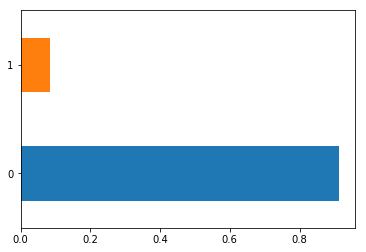

In [295]:
pa_df_filtered.TARGET.value_counts(normalize=True).plot.barh()
plt.show()

#### Segment filtered data usine TARGET Variable

In [296]:
pa_df_filtered_t0 = pa_df_filtered[pa_df_filtered.TARGET==0]
pa_df_filtered_t1 = pa_df_filtered[pa_df_filtered.TARGET==1]

In [297]:
pa_df_filtered.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE_y          object
AMT_ANNUITY_y                float64
AMT_APPLICATION              float64
AMT_CREDIT_y                 float64
AMT_DOWN_PAYMENT             float64
AMT_GOODS_PRICE_y            float64
RATE_DOWN_PAYMENT            float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_TYPE_SUITE               object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
NAME_SELLER_INDUSTRY          object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

#### Multivariate analysis of column - NAME_CONTRACT_TYPE vs  NAME_CONTRACT_STATUS vs TARGET

In [298]:
pa_df_filtered.TARGET.mean()

0.08561617833727397

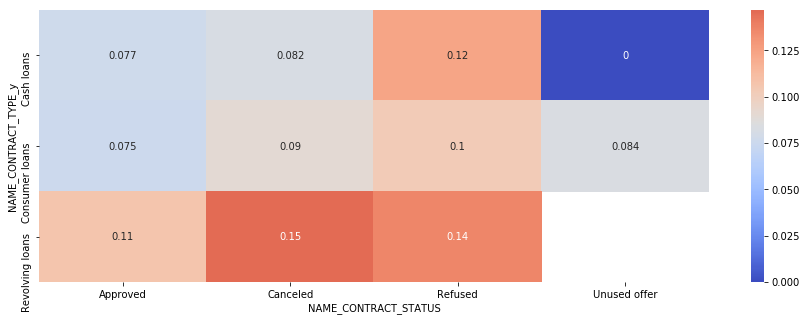

In [299]:
plt.figure(figsize=(15,5))
temp = pa_df_filtered.pivot_table(index='NAME_CONTRACT_TYPE_y',columns=['NAME_CONTRACT_STATUS'],values='TARGET')
#temp.dropna(inplace=True)
sns.heatmap(data=temp,cmap='coolwarm',annot=True,center=.086)

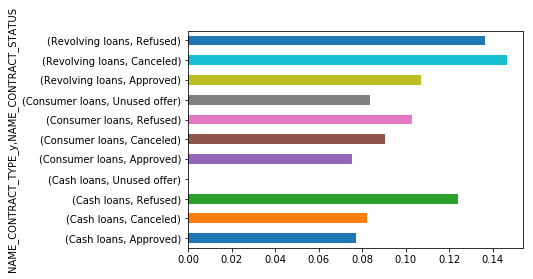

In [300]:
pa_df_filtered.groupby(['NAME_CONTRACT_TYPE_y','NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate analysis of column - NAME_CONTRACT_TYPE vs NAME_CLIENT_TYPE vs TARGET

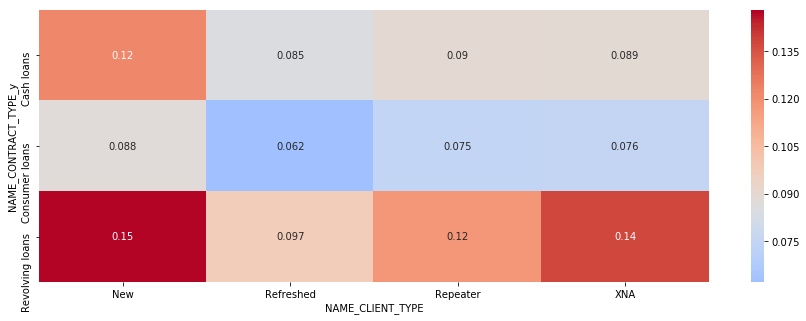

In [301]:
plt.figure(figsize=(15,5))
temp = pa_df_filtered.pivot_table(index='NAME_CONTRACT_TYPE_y',columns=['NAME_CLIENT_TYPE'],values='TARGET')
#temp.dropna(inplace=True)
sns.heatmap(data=temp,cmap='coolwarm',annot=True,center=.086)

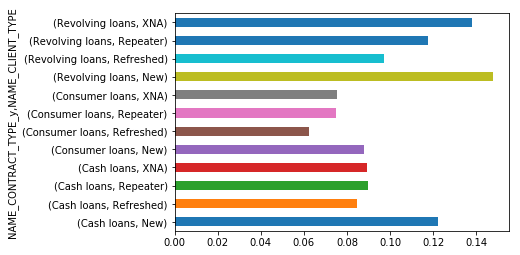

In [302]:
pa_df_filtered.groupby(['NAME_CONTRACT_TYPE_y','NAME_CLIENT_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate analysis of column - NAME_CONTRACT_TYPE_y vs NAME_CASH_LOAN_PURPOSE vs TARGET

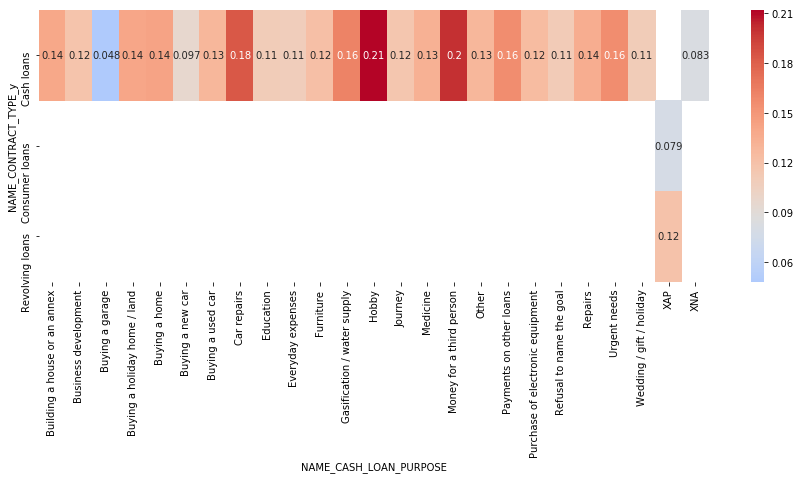

In [303]:
plt.figure(figsize=(15,5))
temp = pa_df_filtered.pivot_table(index='NAME_CONTRACT_TYPE_y',columns=['NAME_CASH_LOAN_PURPOSE'],values='TARGET')
sns.heatmap(data=temp,cmap='coolwarm',annot=True,center=.086)

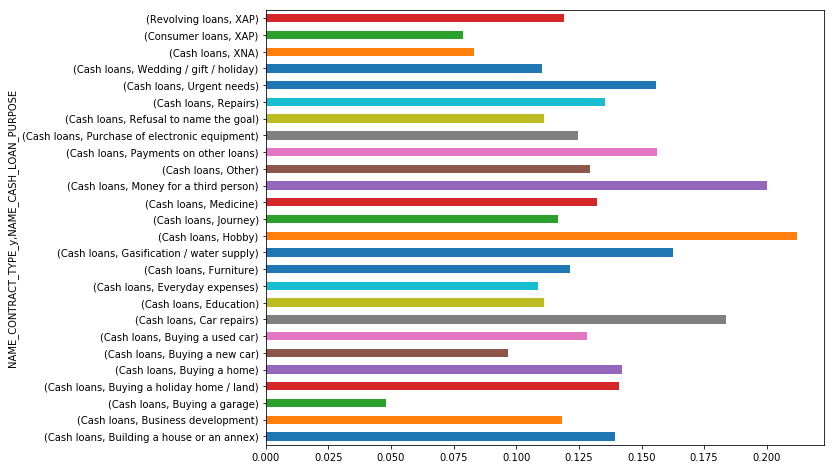

In [304]:
plt.figure(figsize=(10,8))
pa_df_filtered.groupby(['NAME_CONTRACT_TYPE_y','NAME_CASH_LOAN_PURPOSE'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate analysis of column - NAME_GOODS_CATEGORY vs CODE_REJECT_REASON vs TARGET


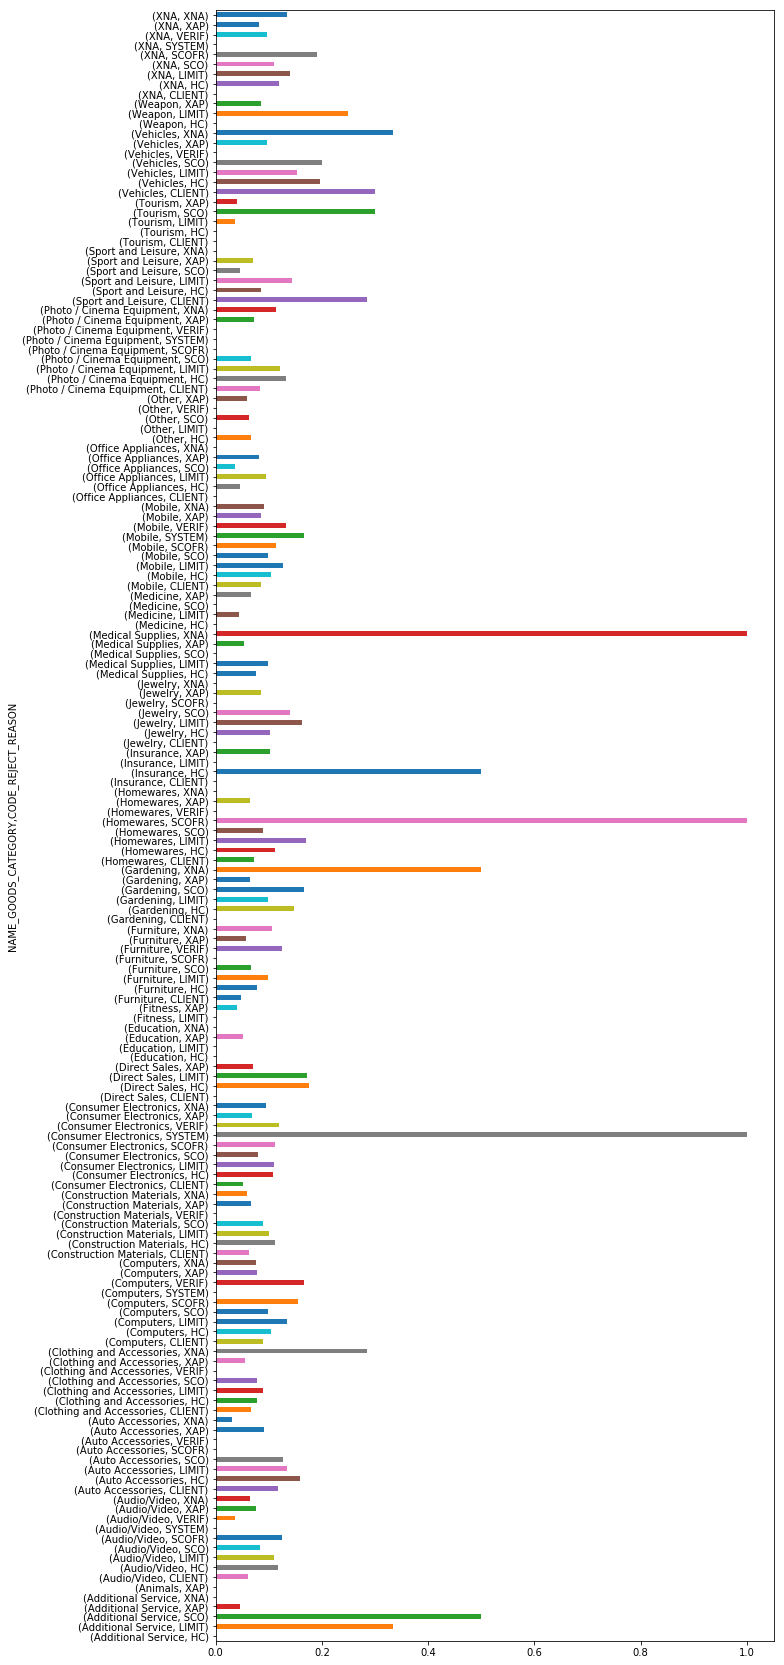

In [305]:
plt.figure(figsize=(10,30))
pa_df_filtered.groupby(['NAME_GOODS_CATEGORY','CODE_REJECT_REASON'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate analysis of columns NAME_GOODS_CATEGORY vs NAME_CONTRACT_STATUS vs TARGET

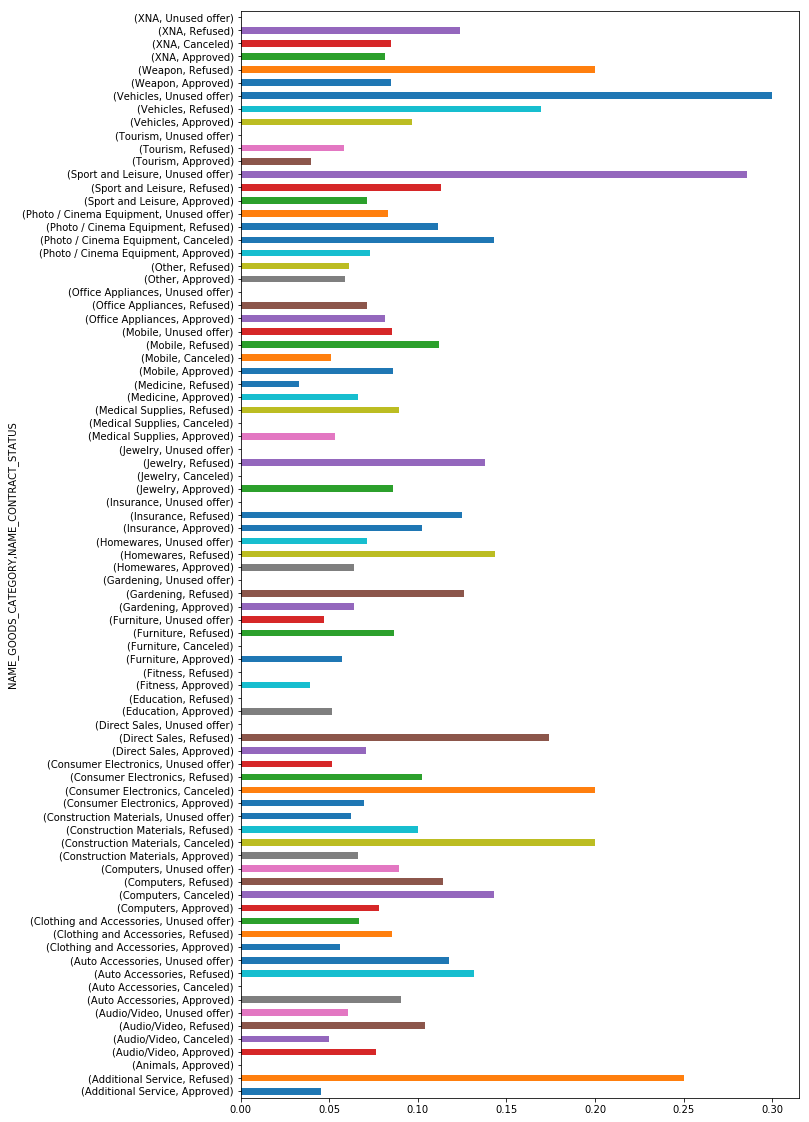

In [306]:
plt.figure(figsize=(10,20))
pa_df_filtered.groupby(['NAME_GOODS_CATEGORY','NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate analysis of column CHANNEL_TYPE vs NAME_CONTRACT_STATUS

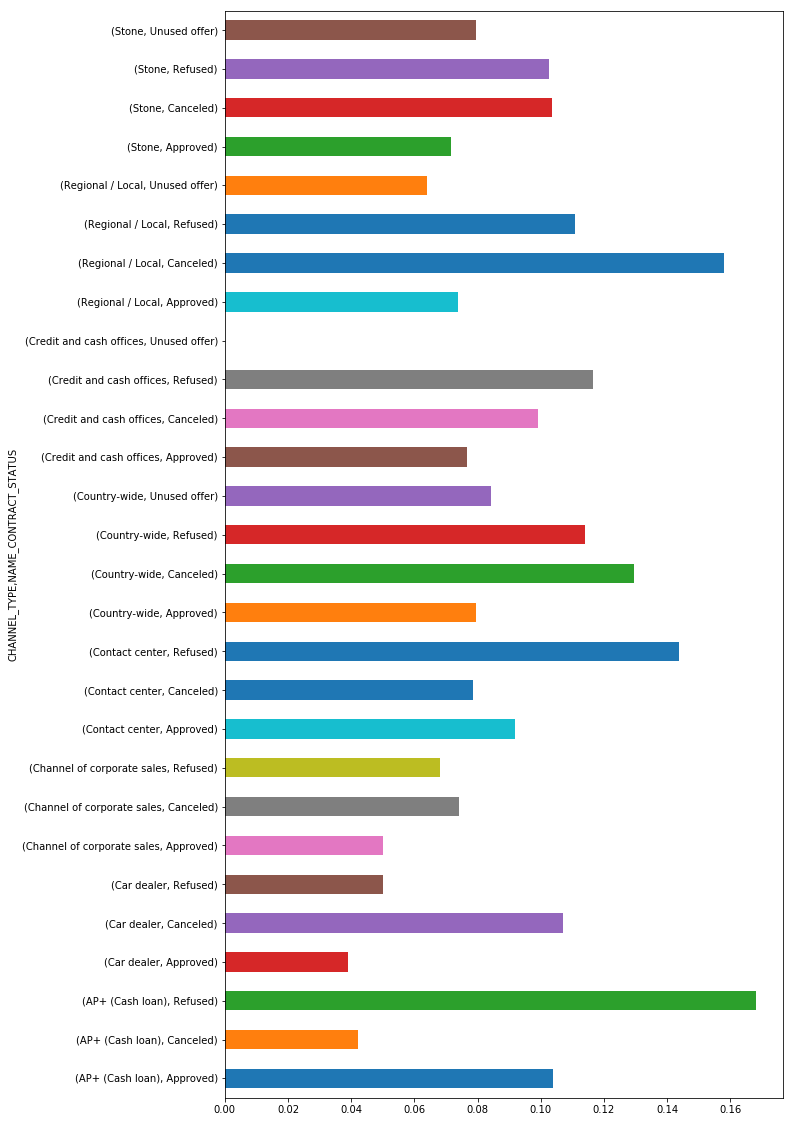

In [307]:
plt.figure(figsize=(10,20))
pa_df_filtered.groupby(['CHANNEL_TYPE','NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.barh()
plt.show()

#### Multivariate Analysis of columns NAME_CONTRACT_TYPE_y vs NAME_CASH_LOAN_PURPOSE vs TARGET

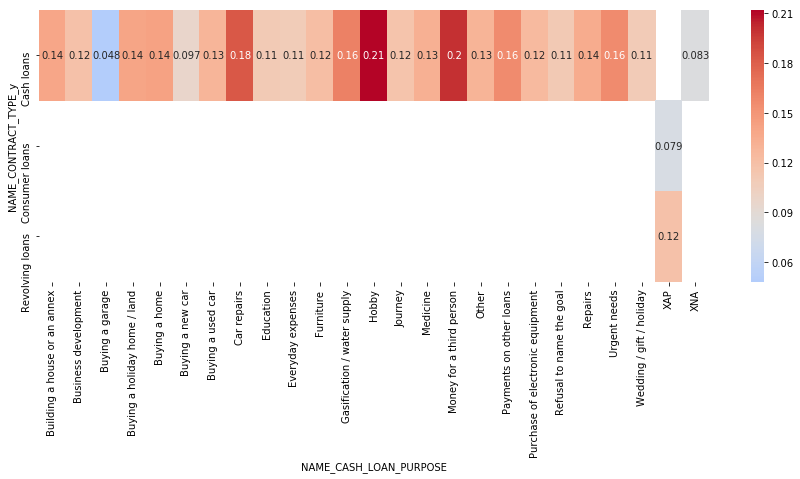

In [308]:
plt.figure(figsize=(15,5))
temp = pa_df_filtered.pivot_table(index='NAME_CONTRACT_TYPE_y',columns=['NAME_CASH_LOAN_PURPOSE'],values='TARGET')
sns.heatmap(data=temp,cmap='coolwarm',annot=True,center=.084)

#### Multivariate Analysis of columns NAME_CONTRACT_TYPE_y vs NAME_CONTRACT_STATUS vs TARGET

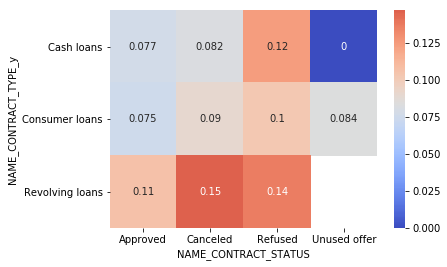

In [309]:
temp = pa_df_filtered.pivot_table(index='NAME_CONTRACT_TYPE_y',columns=['NAME_CONTRACT_STATUS'],values='TARGET')
temp
sns.heatmap(data=temp,cmap='coolwarm',annot=True,center=.084)
plt.show()